### Visualise data

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
final_data = pd.read_csv('../data/final_data.csv')

In [42]:
final_data['calendar_date'] = pd.to_datetime(final_data['calendar_date'], format='%Y-%m-%d')

In [43]:
metrics = ['calendar_date', 'depot_store_id','product_waste', 'product_stockout', 'depot_waste', 
           'forecast_waste', 'forecast_stockout', 'waste_prediction_waste',
          'waste_prediction_stockout', 'stock_waste', 'stock_stockout', 'negative_stockfile']

In [64]:
final_data[metrics]

,calendar_date,depot_store_id,product_waste,product_stockout,depot_waste,forecast_waste,forecast_stockout,waste_prediction_waste,waste_prediction_stockout,stock_waste,stock_stockout,negative_stockfile
0,2018-07-07,5173.0,False,False,True,False,True,False,False,False,False,False
1,2018-07-07,5908.0,False,False,False,False,True,True,False,False,False,False
2,2018-07-07,5173.0,False,False,False,False,True,True,False,False,False,False
3,2018-07-07,5380.0,False,False,False,False,False,False,False,False,False,False
4,2018-07-07,5212.0,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1334778,2018-08-06,5908.0,False,False,False,False,False,True,False,False,False,False
1334779,2018-08-06,5173.0,False,False,False,True,False,True,False,False,False,False
1334780,2018-08-06,6567.0,False,False,False,True,False,True,False,False,False,False
1334781,2018-08-06,5212.0,False,False,False,False,False,True,True,False,False,False


In [127]:
forew_by_date = final_data.groupby('calendar_date')['forecast_waste'].sum().reset_index()

In [137]:
forew_by_date['dow'] = forew_by_date['calendar_date'].dt.day_name()

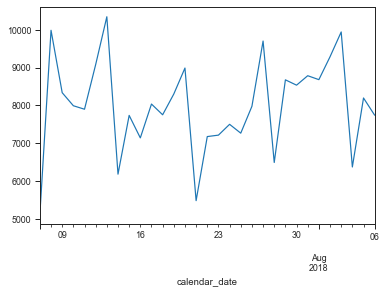

In [138]:
forew_by_date.set_index('calendar_date')['forecast_waste'].plot()

[]

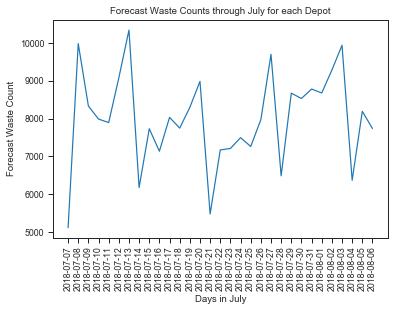

In [139]:
#fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

sns.set_context("paper")
sns.axes_style("whitegrid")
sns.set_style("ticks",{"xtick.major.size":8,
                       "ytick.major.size":8})
sns.lineplot(x="calendar_date", y="forecast_waste",
                     data=forew_by_date)
plt.title("Forecast Waste Counts through July for each Depot")
plt.ylabel("Forecast Waste Count")
plt.xlabel("Days in July") 
plt.xticks(forew_by_date['calendar_date'], rotation='90')
plt.plot()

In [140]:
forew_by_date.groupby('dow')['forecast_waste'].sum().reset_index()

,dow,forecast_waste
0,Friday,38968.0
1,Monday,38957.0
2,Saturday,29635.0
3,Sunday,41760.0
4,Thursday,34635.0
5,Tuesday,32304.0
6,Wednesday,31590.0


[]

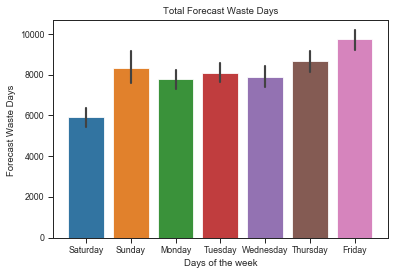

In [143]:
sns.set_context("paper")
sns.axes_style("whitegrid")
sns.set_style("ticks",{"xtick.major.size":8,
                       "ytick.major.size":8})
sns.set_context('paper')
sns.barplot(x='dow', y='forecast_waste', data=forew_by_date)

plt.title("Total Forecast Waste Days")
plt.ylabel("Forecast Waste Days ")
plt.xlabel("Days of the week") 
#plt.xticks(forew_by_date['calendar_date'], rotation='90')
plt.plot()